<a href="https://colab.research.google.com/github/Cill19/Djikstra-Greedy-Algorithm/blob/main/ALGORITMA_BEST_ROUTE_DJIKSTRA_%26_GREEDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
Kabupaten = ox.geocode_to_gdf("purbalingga, Indonesia")
Kabupaten.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((109.22367 -7.24629, 109.22459 -7.246...",109.223671,-7.4935,109.584518,-7.16118,27450278,relation,9686819,-7.32733,109.399899,boundary,administrative,12,0.452167,county,Purbalingga,"Purbalingga, Central Java, Java, Indonesia"


In [ ]:
Kabupaten.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

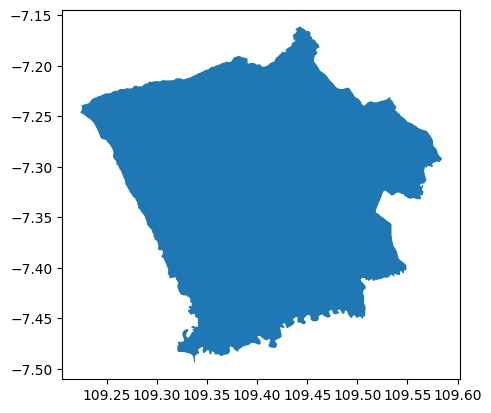

In [ ]:
Kabupaten.plot()

In [ ]:
import osmnx as ox

# Nama kabupaten purbalingga
kabupaten_purbalingga = "purbalingga, Indonesia"

# Geocode untuk Kabupaten purbalingga
kabupaten_gdf = ox.geocode_to_gdf(kabupaten_purbalingga)

# Menampilkan hasil
print(kabupaten_gdf.head())


                                            geometry   bbox_west  bbox_south  \
0  POLYGON ((109.22367 -7.24629, 109.22459 -7.246...  109.223671     -7.4935   

    bbox_east  bbox_north  place_id  osm_type   osm_id      lat         lon  \
0  109.584518    -7.16118  27450278  relation  9686819 -7.32733  109.399899   

      class            type  place_rank  importance addresstype         name  \
0  boundary  administrative          12    0.452167      county  Purbalingga   

                                 display_name  
0  Purbalingga, Central Java, Java, Indonesia  


<Axes: >

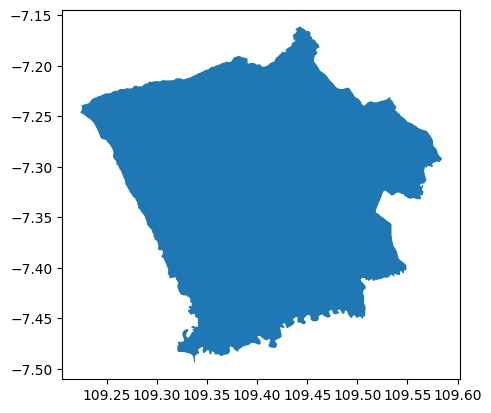

In [ ]:
kabupaten_gdf.plot()

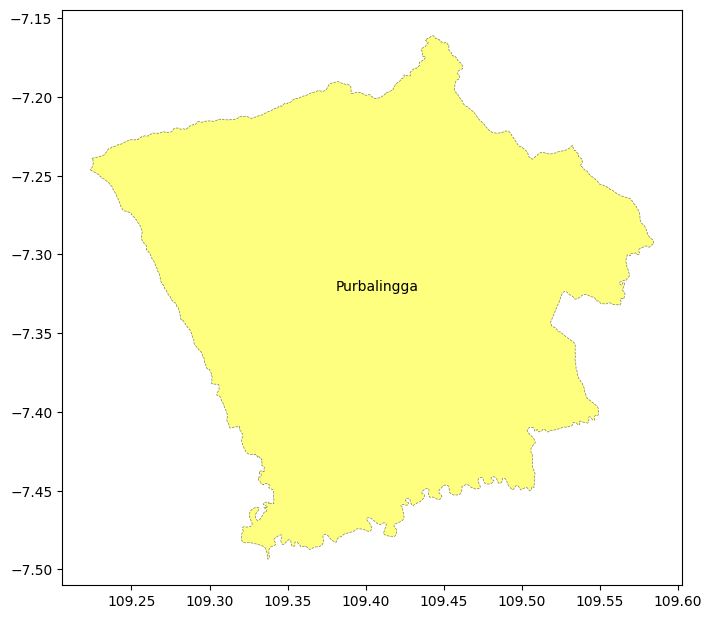

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
kabupaten_gdf.plot(ax=ax, color="yellow", alpha=0.5, linestyle="--", linewidth=0.5, edgecolor="black")

for idx, row in kabupaten_gdf.iterrows():
  ax.annotate(text=row["name"], xy=row.geometry.centroid.coords[0], ha="center", fontsize=10, color="black")

plt.show()

In [ ]:
place_name = "purbalingga, Central Java, Indonesia"

tag_amenity = {"amenity": "hospital"}
rumah_sakit = ox.features_from_place(place_name, tag_amenity)
rumah_sakit.shape

(17, 22)

In [ ]:
rumah_sakit.head(12)

geometry  \
element id                                                               
node    2389185695                          POINT (109.36462 -7.39292)   
        2903669830                          POINT (109.36391 -7.39226)   
        3062525817                          POINT (109.34364 -7.36892)   
        3178385275                          POINT (109.37404 -7.39383)   
        9820300485                          POINT (109.32195 -7.34982)   
        11078196605                         POINT (109.34577 -7.38385)   
way     302020262    POLYGON ((109.36383 -7.39225, 109.36389 -7.392...   
        304749659    POLYGON ((109.31828 -7.27555, 109.31836 -7.275...   
        313914998    POLYGON ((109.31969 -7.34967, 109.31976 -7.349...   
        313915038    POLYGON ((109.3198 -7.34972, 109.31985 -7.3496...   
        424225101    POLYGON ((109.34072 -7.41509, 109.34073 -7.415...   
        598996424    POLYGON ((109.50727 -7.39166, 109.50729 -7.391...   

                      amenity                                      addr:city  \
element id                                                                     
node    2389185695   hospital                                            NaN   
        2903669830   hospital                                    Purbalingga   
        3062525817   hospital                                    purbalingga   
        3178385275   hospital                                            NaN   
        9820300485   hospital  Kutasari, Purbalingga, Jawa Tengah, Indonesia   
        11078196605  hospital                                            NaN   
way     302020262    hospital                                    Purbalingga   
        304749659    hospital                                            NaN   
        313914998    hospital                                            NaN   
        313915038    hospital                                            NaN   
        424225101    hospital                                    Purbalingga   
        598996424    hospital                                            NaN   

                    addr:housenumber addr:postcode  \
element id                                           
node    2389185695               NaN           NaN   
        2903669830               116         53311   
        3062525817               NaN           NaN   
        3178385275               NaN           NaN   
        9820300485               NaN           NaN   
        11078196605              NaN         53372   
way     302020262                116           NaN   
        304749659                NaN           NaN   
        313914998                NaN           NaN   
        313915038                NaN           NaN   
        424225101                NaN           NaN   
        598996424                NaN           NaN   

                                                           addr:street  \
element id                                                               
node    2389185695                                                 NaN   
        2903669830                                Jalan Letkol Isdiman   
        3062525817                                                 NaN   
        3178385275                                                 NaN   
        9820300485                                                 NaN   
        11078196605  Jl. Letnan Sudani, Desa karangsentulKec. Padam...   
way     302020262                                 Jalan Letkol Isdiman   
        304749659                                                  NaN   
        313914998                                                  NaN   
        313915038                                                  NaN   
        424225101                                                  NaN   
        598996424                                                  NaN   

                    emergency                                       name  \
element id                        

<Axes: >

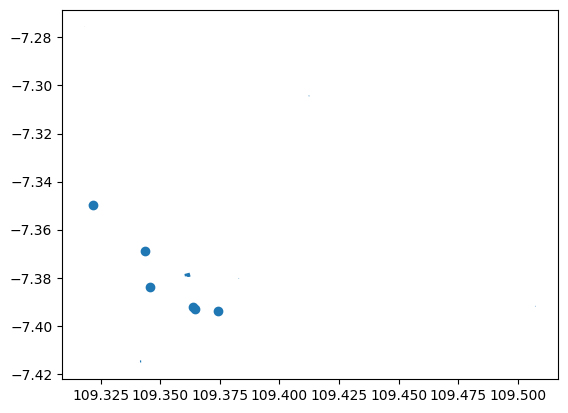

In [ ]:
rumah_sakit.plot()

In [ ]:
place = "purbalingga, Indonesia"
tags = {"building": True}
building = ox.features_from_place(place, tags)
building.shape

(167756, 106)

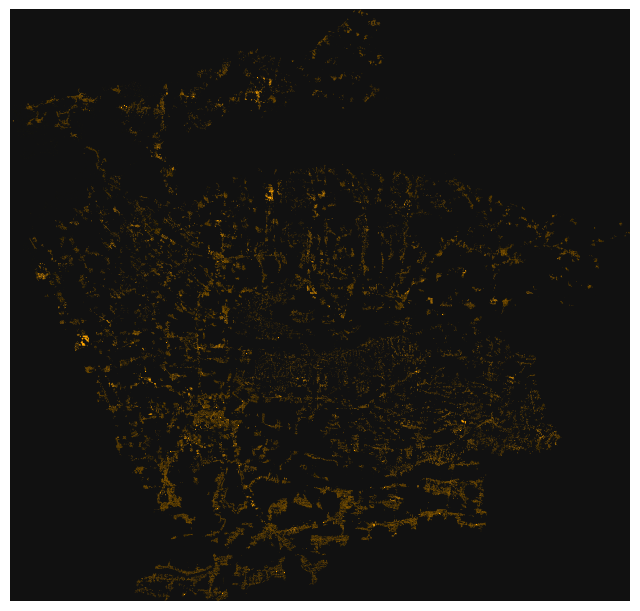

In [ ]:
fig, ax = ox.plot_footprints(building, figsize=(8, 8))

In [ ]:
place = "purbalingga, Indonesia"
tag_building = {"amenity": "hospital"}
building = ox.features_from_place(place, tag_building)
building.shape

(17, 22)

In [ ]:
building.head()

geometry   amenity  \
element id                                                 
node    2389185695  POINT (109.36462 -7.39292)  hospital   
        2903669830  POINT (109.36391 -7.39226)  hospital   
        3062525817  POINT (109.34364 -7.36892)  hospital   
        3178385275  POINT (109.37404 -7.39383)  hospital   
        9820300485  POINT (109.32195 -7.34982)  hospital   

                                                        addr:city  \
element id                                                          
node    2389185695                                            NaN   
        2903669830                                    Purbalingga   
        3062525817                                    purbalingga   
        3178385275                                            NaN   
        9820300485  Kutasari, Purbalingga, Jawa Tengah, Indonesia   

                   addr:housenumber addr:postcode           addr:street  \
element id                                                                
node    2389185695              NaN           NaN                   NaN   
        2903669830              116         53311  Jalan Letkol Isdiman   
        3062525817              NaN           NaN                   NaN   
        3178385275              NaN           NaN                   NaN   
        9820300485              NaN           NaN                   NaN   

                   emergency                                       name  \
element id                                                                
node    2389185695       NaN                                        NaN   
        2903669830       yes  Markas & Klinik PMI Kabupaten Purbalingga   
        3062525817       NaN                       PKD Desa Karanglewas   
        3178385275       NaN            Persatuan Dokter Gigi Indonesia   
        9820300485       NaN                         Puskesmas Kutasari   

                   healthcare name:hi  ... operator landuse addr:full  \
element id                             ...                              
node    2389185695        NaN     NaN  ...      NaN     NaN       NaN   
        2903669830        NaN     NaN  ...      NaN     NaN       NaN   
        3062525817        NaN     NaN  ...      NaN     NaN       NaN   
        3178385275        NaN     NaN  ...      NaN     NaN       NaN   
        9820300485   hospital     NaN  ...      NaN     NaN       NaN   

                   contact:email contact:fax contact:phone contact:website  \
element id                                                                   
node    2389185695           NaN         NaN           NaN             NaN   
        2903669830           NaN         NaN           NaN             NaN   
        3062525817           NaN         NaN           NaN             NaN   
        3178385275           NaN         NaN           NaN             NaN   
        9820300485           NaN         NaN           NaN             NaN   

                   designation operator:type source  
element id                                           
node    2389185695         NaN           NaN    NaN  
        2903669830         NaN           NaN    NaN  
        3062525817         NaN           NaN    NaN  
        3178385275         NaN           NaN    NaN  
        9820300485         NaN           NaN    NaN  

[5 rows x 22 columns]

<Axes: >

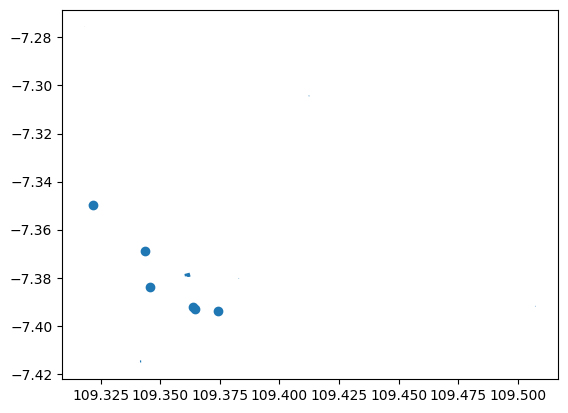

In [ ]:
building.plot()

In [ ]:
import osmnx as ox
north, south, east, west = -7.207566, -7.494622, 109.542294, 109.263189
building_bbox = ox.features.features_from_bbox((west, south, east, north), tags={"building": True})
print(building_bbox.shape)

(273360, 125)


In [ ]:
building_bbox.head(10)

geometry  \
element id                                       
node    1887657631  POINT (109.29846 -7.45788)   
        2817178267  POINT (109.28721 -7.45572)   
        2817186660  POINT (109.27915 -7.45906)   
        3062522679  POINT (109.42979 -7.42827)   
        3067880479   POINT (109.35988 -7.2742)   
        3074370796   POINT (109.3218 -7.27905)   
        3096813969  POINT (109.26447 -7.22599)   
        3098119279    POINT (109.3675 -7.3044)   
        9804267053  POINT (109.33958 -7.34719)   
        9820286363  POINT (109.32066 -7.34989)   

                                                            addr:city  \
element id                                                              
node    1887657631                                           Sokaraja   
        2817178267                                                NaN   
        2817186660                                                NaN   
        3062522679                                        Purbalingga   
        3067880479                  Palumbungan Bobotsari Purbalingga   
        3074370796                                                NaN   
        3096813969                                        Purbalingga   
        3098119279                             Bobotsari, Purbalingga   
        9804267053  Kecamatan Bojongsari, Kabupaten Purbalingga, J...   
        9820286363      Kutasari, Purbalingga, Jawa Tengah, Indonesia   

                             amenity building  \
element id                                      
node    1887657631  place_of_worship      yes   
        2817178267               NaN   office   
        2817186660               NaN   office   
        3062522679               NaN   school   
        3067880479      kindergarten   school   
        3074370796            school   school   
        3096813969               NaN   public   
        3098119279      kindergarten   school   
        9804267053       marketplace      yes   
        9820286363       marketplace      yes   

                                                 name  religion  \
element id                                                        
node    1887657631      Klenteng Hok Tek Bio Sokaraja  buddhist   
        2817178267  Kantor Kepala Desa Sokaraja Kulon       NaN   
        2817186660                 Kantor Kepala Desa       NaN   
        3062522679              SMA Negeri 1 Bukateja       NaN   
        3067880479                     BA Palumbungan    muslim   
        3074370796                  SD N 1 Sangkanayu       NaN   
        3096813969                    Posko Bambangan       NaN   
        3098119279                       BA Bobotsari    muslim   
        9804267053                    Pasar Desa Beji       NaN   
        9820286363                     Pasar Kutasari       NaN   

                                        addr:street addr:postcode  \
element id                                                          
node    1887657631                              NaN           NaN   
        2817178267                              NaN           NaN   
        2817186660                              NaN           NaN   
        3062522679              Jl. Raya Purwandaru           NaN   
        3067880479                              NaN         53353   
        3074370796                              NaN           NaN   
        3096813969                              NaN           NaN   
        3098119279                              NaN           NaN   
        9804267053  Jl. Raya Owabong, Dusun I, Beji         53362   
        9820286363     Jalan Raya Kutasari - Tobong           NaN   

                           pedagogy type:id  ... animal_boarding  \
element id                                   ...                   
node    1887657631              NaN     NaN  ...             NaN   
        2817178267              NaN     NaN  ...             NaN   
        2817186660              NaN     NaN  ...             NaN 

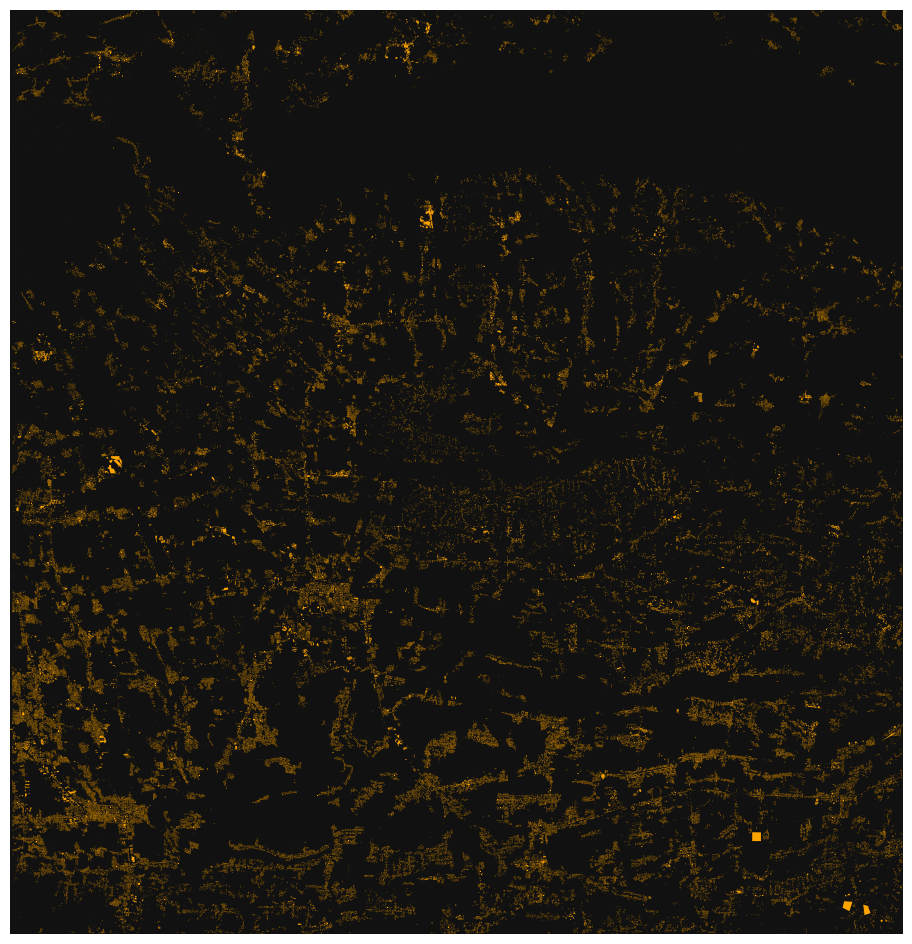

In [ ]:
fig, ax = ox.plot_footprints(building_bbox, figsize=(12, 12))

In [ ]:
!pip install contextily
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.4 MB/s eta 0:00:00


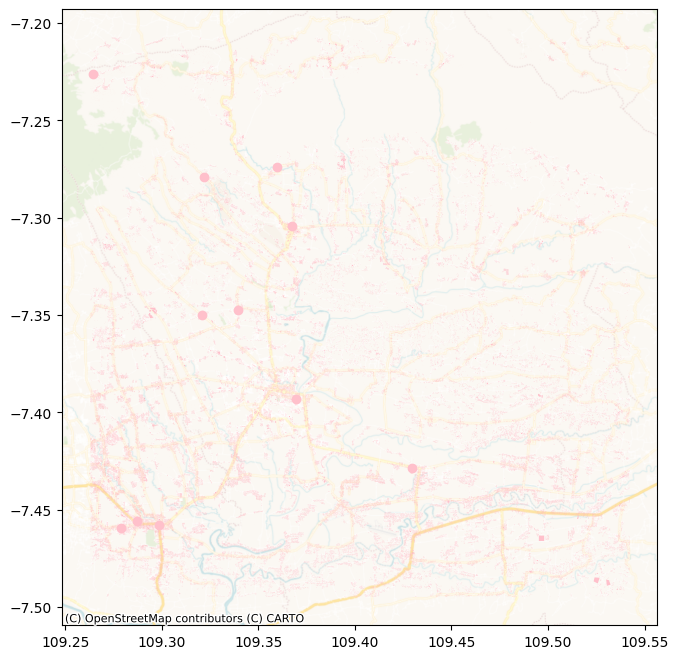

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 8))

building_bbox.plot(ax=ax, color="pink")

cx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.VoyagerNoLabels
)

plt.show()

In [ ]:
!pip install --upgrade osmnx geopandas contextily

# Definisikan Tempat

In [ ]:
import osmnx as ox

def get_purbalingga_graph():
    location = "Purbalingga, Central Java, Indonesia"
    G = ox.graph_from_place(location, network_type='drive')
    return G

# Mencari Best Route

In [ ]:
# Temukan node terdekat untuk lokasi kafe

def get_nearest_nodes(G, coord):
    return ox.nearest_nodes(G, coord[1], coord[0])

# Menggunakan Dijkstra

In [ ]:
# Implementasi algoritma Dijkstra
import networkx as nx
import time

def dijkstra_route(G, start_node, end_node):
    start_time = time.time()
    route = nx.shortest_path(G, source=start_node, target=end_node, weight='length')
    end_time = time.time()
    execution_time = end_time - start_time
    distance = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length')
    return route, distance, execution_time

# Menggunakan Greedy

In [ ]:
# Implementasi algoritma Greedy

def greedy_route(G, start_node, end_node):
    start_time = time.time()
    route = [start_node]
    current_node = start_node

    while current_node != end_node:
        neighbors = list(G[current_node])
        next_node = min(neighbors, key=lambda x: nx.shortest_path_length(G, source=x, target=end_node, weight='length'))
        route.append(next_node)
        current_node = next_node

    end_time = time.time()
    execution_time = end_time - start_time
    distance = sum(G[u][v][0]['length'] for u, v in zip(route[:-1], route[1:]))

    return route, distance, execution_time

# Visualiasi

In [ ]:
import folium

def visualize_route(G, route, algorithm_name="route", map_name="route_map.html"):
    route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
    route_map = folium.Map(location=route_coords[0], zoom_start=15)
    folium.PolyLine(route_coords, color="blue", weight=5, opacity=0.7).add_to(route_map)
    folium.Marker(route_coords[0], popup="Start", icon=folium.Icon(color="green")).add_to(route_map)
    folium.Marker(route_coords[-1], popup="End", icon=folium.Icon(color="red")).add_to(route_map)
    filename = f"{algorithm_name}_{map_name}"
    route_map.save(filename)
    print(f"Peta {algorithm_name} disimpan di {filename}")
    return route_map

# Perbandingan antar kedua algoritma

In [ ]:
def compare_routes(G, coord_start_1, coord_start_2, coord_end):
    start_node_1 = get_nearest_nodes(G, coord_start_1)
    start_node_2 = get_nearest_nodes(G, coord_start_2)
    end_node = get_nearest_nodes(G, coord_end)

    results = []

    for i, start_node in enumerate([start_node_1, start_node_2], start=1):
        print(f"\n--- Perbandingan Rute untuk Titik Start {i} ---")

        # Dijkstra
        dijkstra_route_result = dijkstra_route(G, start_node, end_node)
        print(f"Dijkstra (Titik {i}): Jarak {dijkstra_route_result[1]:.2f} m, Waktu {dijkstra_route_result[2]:.4f} detik")
        dijkstra_map = visualize_route(G, dijkstra_route_result[0], algorithm_name=f"dijkstra_{i}", map_name="route_purbalingga.html")

        # Greedy
        greedy_route_result = greedy_route(G, start_node, end_node)
        print(f"Greedy (Titik {i}): Jarak {greedy_route_result[1]:.2f} m, Waktu {greedy_route_result[2]:.4f} detik")
        greedy_map = visualize_route(G, greedy_route_result[0], algorithm_name=f"greedy_{i}", map_name="route_purbalingga.html")

        # Simpan hasil
        results.append({
            'start_point': i,
            'dijkstra': {
                'distance': dijkstra_route_result[1],
                'time': dijkstra_route_result[2],
                'map': dijkstra_map
                },
            'greedy': {
                'distance': greedy_route_result[1],
                'time': greedy_route_result[2],
                'map': greedy_map
            }
        })

    return results

In [ ]:
# Koordinat titik start dan tujuan
kafe_a = (-7.3796, 109.3617)  # Titik awal 1
kafe_b = (-7.3733, 109.3558)  # Titik awal 2
tujuan = (-7.3700, 109.3600)  # Titik tujuan

# Dapatkan graph dan jalankan perbandingan
G = get_purbalingga_graph()
results = compare_routes(G, kafe_a, kafe_b, tujuan)


--- Perbandingan Rute untuk Titik Start 1 ---
Dijkstra (Titik 1): Jarak 1713.90 m, Waktu 0.0019 detik
Peta dijkstra_1 disimpan di dijkstra_1_route_purbalingga.html
Greedy (Titik 1): Jarak 1718.19 m, Waktu 0.1032 detik
Peta greedy_1 disimpan di greedy_1_route_purbalingga.html

--- Perbandingan Rute untuk Titik Start 2 ---
Dijkstra (Titik 2): Jarak 570.40 m, Waktu 0.0004 detik
Peta dijkstra_2 disimpan di dijkstra_2_route_purbalingga.html
Greedy (Titik 2): Jarak 586.08 m, Waktu 0.0045 detik
Peta greedy_2 disimpan di greedy_2_route_purbalingga.html


In [ ]:
# Tampilkan hasil perbandingan
for result in results:
    print(f"\n--- Hasil untuk Titik Start {result['start_point']} ---")


--- Hasil untuk Titik Start 1 ---

--- Hasil untuk Titik Start 2 ---


In [ ]:
 print(f"Dijkstra: Jarak {result['dijkstra']['distance']:.2f} m, Waktu {result['dijkstra']['time']:.4f} detik")


Dijkstra: Jarak 570.40 m, Waktu 0.0004 detik


In [ ]:
 print(f"Greedy: Jarak {result['greedy']['distance']:.2f} m, Waktu {result['greedy']['time']:.4f} detik")


Greedy: Jarak 586.08 m, Waktu 0.0045 detik


# Visualisasi Jarak Rute Djikstra (Best Route)

In [ ]:
# Tampilkan peta Dijkstra untuk Rute 1
print("Hasil Rute Dijkstra 1:")
results[0]['dijkstra']['map']

Hasil Rute Dijkstra 1:


In [ ]:
# Tampilkan peta Greedy untuk Rute 1
print("Hasil Rute Greedy 1:")
results[0]['greedy']['map']

Hasil Rute Greedy 1:


In [ ]:
# Tampilkan peta Dijkstra untuk Rute 2
print("Hasil Rute Dijkstra 2:")
results[1]['dijkstra']['map']

Hasil Rute Dijkstra 2:


In [ ]:
# Tampilkan peta Greedy untuk Rute 2
print("Hasil Rute Greedy 2:")
results[1]['greedy']['map']

Hasil Rute Greedy 2:


Hasilnya Djikstra memiliki jarak dan waktu terpendek dibanding Greedy

end here